# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

data= pd.read_csv('../Data/ttc_subway_delay_2018_2019.csv')
data.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,03:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
2,3,2019-01-01,03:09,Tuesday,DUPONT STATION,EUATC,6,11,N,YU,5381,ATC RC&S Equipment,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
3,4,2019-01-01,03:26,Tuesday,ST CLAIR WEST STATION,EUATC,4,9,N,YU,5571,ATC RC&S Equipment,43.683888,-79.415113,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
4,5,2019-01-01,08:04,Tuesday,DAVISVILLE STATION,MUNOA,5,10,S,YU,0,No Operator Immediately Available - Not E.S.A....,43.697778,-79.397222,Yonge University Spadina,January,5-9AM,1,8,2019


In [5]:
# Drop the null columns where all values are null
df= data.dropna(axis='columns', how='all')
df.head(2)

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,03:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019


In [6]:
# Drop the null columns where all values are null
df= df.dropna(axis='rows', how='all')
df.describe()

,id,min_delay,min_gap,vehicle,latitude,longitude,month_number,hour,year
count,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000
mean,6863.310647,6.623266,9.832554,5191.731561,43.703585,-79.396935,6.379436,12.837301,2018.486344
std,3962.478567,11.947203,12.070380,1193.592906,0.045849,0.073723,3.439798,5.963701,0.499832
min,1.000000,2.000000,0.000000,0.000000,43.637222,-79.536111,1.000000,0.000000,2018.000000
25%,3434.250000,3.000000,6.000000,5145.000000,43.667222,-79.450000,3.000000,8.000000,2018.000000
50%,6865.500000,4.000000,8.000000,5416.000000,43.686389,-79.398333,6.000000,13.000000,2018.000000
75%,10292.750000,6.000000,10.000000,5796.000000,43.744167,-79.365278,9.000000,18.000000,2019.000000
max,13727.000000,515.000000,519.000000,8065.000000,43.794167,-79.251667,12.000000,23.000000,2019.000000


In [7]:
df = df.loc[(df['min_delay']<30)]
df.count()

id              13465
date            13465
time            13465
day             13465
station         13465
code            13465
min_delay       13465
min_gap         13465
bound           13336
line            13465
vehicle         13465
code_info       13465
latitude        13465
longitude       13465
line_name       13465
month           13465
time_range      13058
month_number    13465
hour            13465
year            13465
dtype: int64

In [8]:
df['Time'] = df['hour'].apply(lambda x: x if x > 5 else x+24)

In [11]:
bins = [6,9,16,20,25,29]
labels= ['morning_rush_hour','mid_day','afternoon_rush_hour','evening','off_operation']
df['Time_group']=pd.cut(df['Time'], bins, labels=labels)
df.head(5)

,id,date,time,day,station,code,min_delay,min_gap,bound,line,...,latitude,longitude,line_name,month,time_range,month_number,hour,year,Time,Time_group
0,1,2019-01-01,03:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,...,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019,27,off_operation
1,2,2019-01-01,03:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,...,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019,27,off_operation
2,3,2019-01-01,03:09,Tuesday,DUPONT STATION,EUATC,6,11,N,YU,...,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019,27,off_operation
3,4,2019-01-01,03:26,Tuesday,ST CLAIR WEST STATION,EUATC,4,9,N,YU,...,43.683888,-79.415113,Yonge University Spadina,January,9PM-1:30AM,1,3,2019,27,off_operation
4,5,2019-01-01,08:04,Tuesday,DAVISVILLE STATION,MUNOA,5,10,S,YU,...,43.697778,-79.397222,Yonge University Spadina,January,5-9AM,1,8,2019,8,morning_rush_hour


In [12]:
data_select = df[['min_delay','Time_group','station','day','code']]
data_select.head()

,min_delay,Time_group,station,day,code
0,11,off_operation,DUPONT STATION,Tuesday,MUATC
1,11,off_operation,EGLINTON WEST STATION,Tuesday,EUATC
2,6,off_operation,DUPONT STATION,Tuesday,EUATC
3,4,off_operation,ST CLAIR WEST STATION,Tuesday,EUATC
4,5,morning_rush_hour,DAVISVILLE STATION,Tuesday,MUNOA


In [14]:
X = data_select[['Time_group','day','station','code']]
X.head()

,Time_group,day,station,code
0,off_operation,Tuesday,DUPONT STATION,MUATC
1,off_operation,Tuesday,EGLINTON WEST STATION,EUATC
2,off_operation,Tuesday,DUPONT STATION,EUATC
3,off_operation,Tuesday,ST CLAIR WEST STATION,EUATC
4,morning_rush_hour,Tuesday,DAVISVILLE STATION,MUNOA


In [15]:
y = data_select["min_delay"].values.reshape(-1, 1)
y

array([[11],
       [11],
       [ 6],
       ...,
       [ 5],
       [ 5],
       [ 3]], dtype=int64)

## Dummy Encoding (Binary Encoded Data)

In [16]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,Time_group_morning_rush_hour,Time_group_mid_day,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,code_TUNIP,code_TUNOA,code_TUO,code_TUOPO,code_TUOS,code_TUS,code_TUSC,code_TUSET,code_TUST,code_TUSUP
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

X_train.head()

,Time_group_morning_rush_hour,Time_group_mid_day,Time_group_afternoon_rush_hour,Time_group_evening,Time_group_off_operation,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,code_TUNIP,code_TUNOA,code_TUO,code_TUOPO,code_TUOS,code_TUS,code_TUSC,code_TUSET,code_TUST,code_TUSUP
8348,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6475,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6185,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8441,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
##no Scaler needs because the data were get_dummies encoded

In [9]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["code"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["code"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [10]:
# plt.show()

# KNN Model

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.879/0.271
k: 3, Train/Test Score: 0.541/0.332
k: 5, Train/Test Score: 0.496/0.340
k: 7, Train/Test Score: 0.467/0.350
k: 9, Train/Test Score: 0.450/0.356
k: 11, Train/Test Score: 0.439/0.358
k: 13, Train/Test Score: 0.431/0.362
k: 15, Train/Test Score: 0.425/0.366
k: 17, Train/Test Score: 0.420/0.373
k: 19, Train/Test Score: 0.416/0.376
k: 21, Train/Test Score: 0.415/0.372
k: 23, Train/Test Score: 0.412/0.368
k: 25, Train/Test Score: 0.407/0.366
k: 27, Train/Test Score: 0.405/0.369
k: 29, Train/Test Score: 0.404/0.366
k: 31, Train/Test Score: 0.402/0.372
k: 33, Train/Test Score: 0.399/0.375
k: 35, Train/Test Score: 0.400/0.371
k: 37, Train/Test Score: 0.395/0.373
k: 39, Train/Test Score: 0.396/0.372


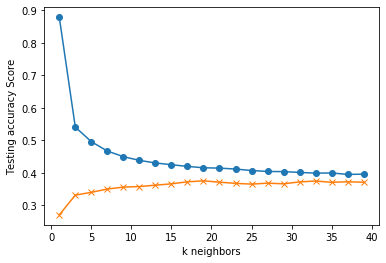

In [21]:
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=33 Test Acc: %.3f' % knn.score(X_test, y_test))

k=33 Test Acc: 0.356


In [27]:
#Make prediction
predictions = knn.predict(X_test)

In [26]:
# make dataframe to compare prediction and actual data
pd.DataFrame({"Prediction": predictions, "Actual": y_test.flatten()})

,Prediction,Actual
0,3,3
1,4,4
2,3,3
3,3,5
4,3,5
...,...,...
3362,4,5
3363,3,3
3364,3,5
3365,5,5
